In [6]:
varias_moedas <- function(x, start_date = "2000-01-01",
                          end_date = Sys.Date(),
                          ask_bid = "bid"){
  suppressPackageStartupMessages({
    library(rbcb)
    library(tidyverse)
  })
  moedas <- mapply(function(x)list(get_currency(x,
                                                start_date = start_date,
                                                end_date = end_date)),
                   x)
  x_d <- data.frame(moedas)
  x_d[grepl(paste0(".",ask_bid),colnames(x_d))] <- NULL
  datas <- grepl(".date",colnames(x_d))
  x_d[,which(datas == T)[-1]] <- NULL
  colnames(x_d) <- c("date",x)
  return(x_d)
}

In [8]:
x_d <- varias_moedas(c("USD","MXN","EUR","RUB"), start_date = "1999-01-01")

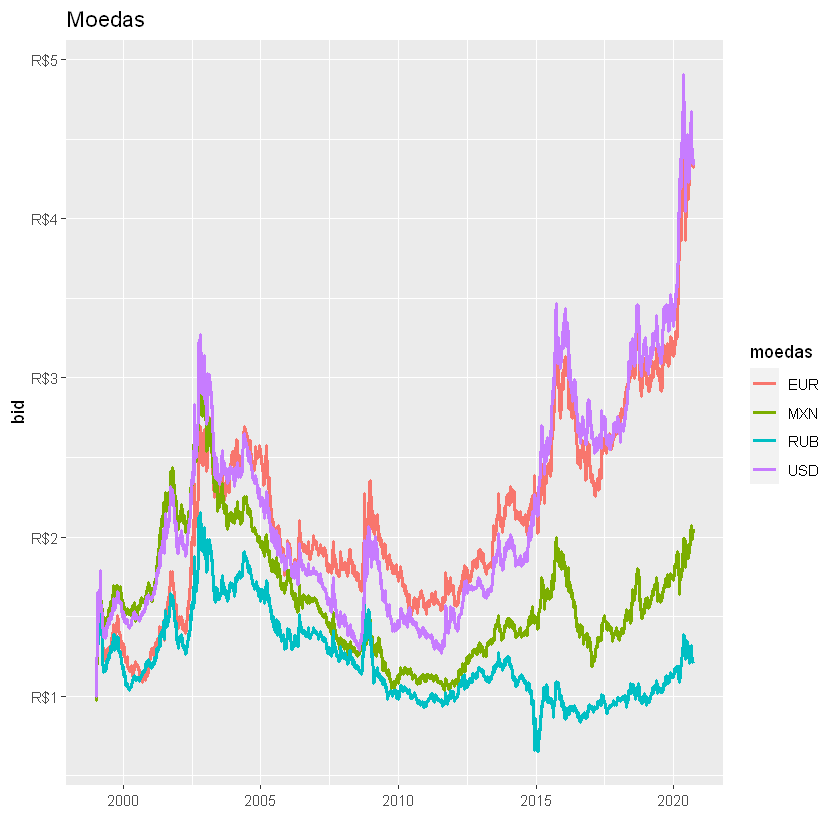

In [9]:
for(i in 2:ncol(x_d)){
  x_d[,i] <- x_d[,i]/x_d[1,i]
}
gat <- x_d %>%
  gather(key = "moedas", value = "bid",-date)
ggplot(gat, aes(x = date, y = bid, col = moedas))+
  geom_line(size = 1)+
  labs(x = "", title = "Moedas")+
  scale_y_continuous(labels = scales::dollar_format(prefix = "R$"))